## Visualize the confusion matrices

Labels: ['catch', 'chips', 'clapping', 'dribbling', 'drinking', 'folding', 'jogging', 'kicking', 'pasta', 'sandwich', 'sitting', 'soup', 'stairs', 'standing', 'teeth', 'typing', 'walking', 'writing']
Column 'precision' - Mean: 0.82, Std: 0.10
Column 'recall' - Mean: 0.80, Std: 0.10
Column 'f1' - Mean: 0.79, Std: 0.11
Column 'kappa' - Mean: 0.79, Std: 0.11
Column 'f1_weighted' - Mean: 0.79, Std: 0.11
Row 1 Confusion Matrix:
[[34  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0 19  7  0  1  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0 12  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0 26  1  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  2 21  8  1  0  1  0  0  0  0]
 [ 

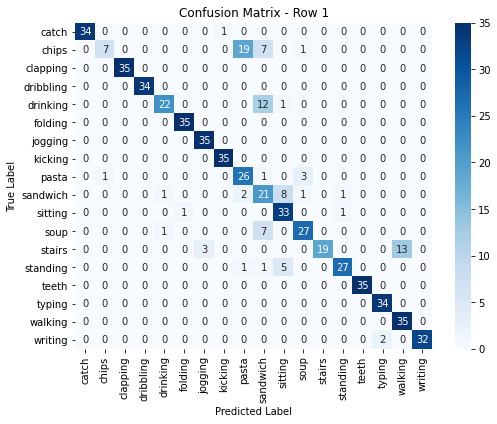

Row 2 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  1  0  0  0  0  3  0  2  0  0  1  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0 18  0  0  0  7  3  2  0  0  0  0  3  0  0]
 [ 0  0  0  2  0 28  0  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2 30  0  0  0  0  2  0  0  0  0  0]
 [ 0  2  0  0  0  1  0  0 27  4  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  4 14  0  0  0  4  0  1  0  0]
 [ 0  0  0  0  1  1  0  0  0  3 23  0  0  5  0  1  0  0]
 [ 0  3  0  0  0  0  0  0 10  0  2 17  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  1  0  0  0  0 33  0  0  0  0  0]
 [ 1  3  0  0  0  1  0  0  0  3  6  0  0 17  3  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0 33  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 29  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0 33  0]
 [ 0  0

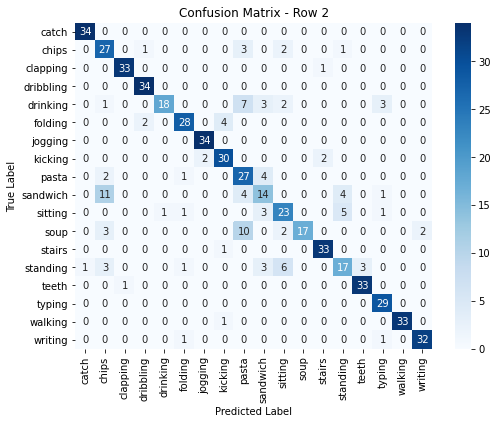

Row 3 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  2 14 14  0  0  0  2  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  5  1  2  0  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0  0  0  2  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6 15  0  1  0  0  0  0  0  0]
 [ 0  1  0  0  2  0  0  0 10 14  2  1  0  4  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 32  0  0  2  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  4  0 24  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  3  6  0  0 24  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  3  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0  0  4  0 21  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0]
 [ 0  3

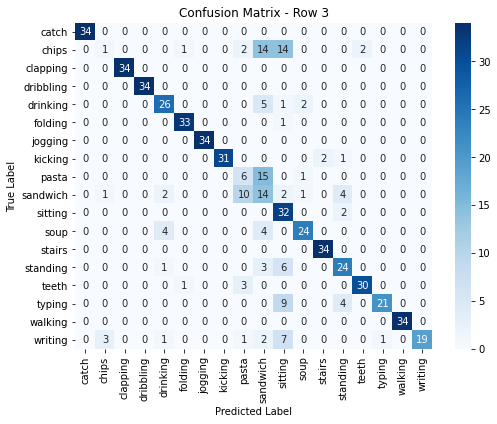

Row 4 Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0 13  0  0  5  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  3  0  0  0  1  0  2  0  0  0]
 [ 0  1  0  0 23  0  0  0  1  3  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  1  0  4  0  1  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0 25  2  0  0  3  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  1  0 29  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0 25  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0 19  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  2  0  1  0  0  1 28  0  0  1]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0 31  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0]
 [ 0  0

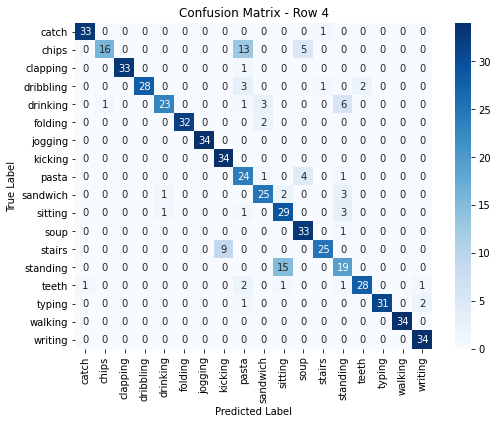

Row 5 Confusion Matrix:
[[23  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  3  5  2  2  0  2  0  0  0  1]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0 32  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0 22  0  0  0  0  5  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0 33  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  1  0 11  0  0  0  0  0  0]
 [ 0  7  0  0  1  0  0  0  0 17  2  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 32  0  0  1  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  2  1  0 28  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0 31  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0 23  1  1  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  1  0  0  1  0  0  0  0  0  0 31  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0]
 [ 0  0

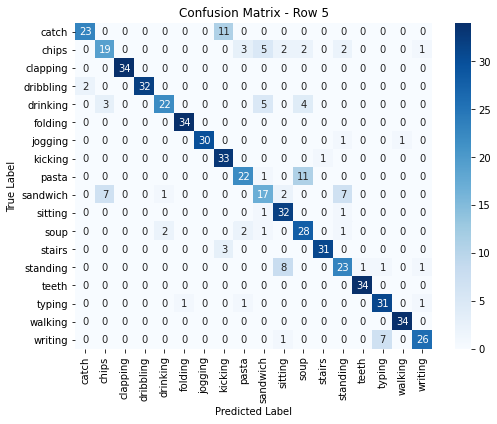

Row 6 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  9  4  0  1  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0 22  0  0  0  0  3  5  1  0  1  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0 28  0  1  0  0  0  4  0  0  0]
 [ 0  7  0  0  4  0  0  0  2 12  5  0  0  4  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  1  0 24  0  0  0  0  2  0  3]
 [ 0  0  0  0  1  0  0  0 27  0  0  6  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0 27  0  0  0  3  0]
 [ 0  1  0  0  0  0  0  0  5  1 11  0  0 12  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0 31  0]
 [ 0  0

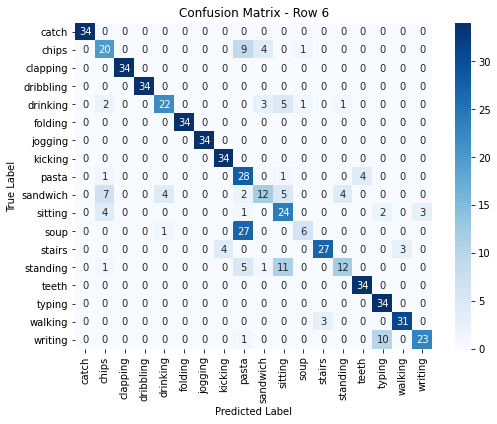

Row 7 Confusion Matrix:
[[ 0  0  0  0  0  0  0 18  0  0 14  0  0  2  0  1  0  0]
 [ 0  3  0  0  8  0  0  0  6  4  1  9  0  1  0  3  0  0]
 [ 0  0  0  0  0  2  0  0  1  2  4  0  0  2  0 19  0  5]
 [ 0  0  9  3  0  0  0 11  0  0  0  0  0  7  4  1  0  0]
 [ 0  0  0  0  2  0  0  0  0  1 17  0  0 12  0  3  0  0]
 [ 3  0  0  2  0  1  0  0  6  1  1  0  0 20  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  3  2 14  0  2  0  2  0  0]
 [ 0  0  0  0  5  0  0  0 11  1  0 13  0  3  0  2  0  0]
 [ 0  0  0  0  9  0  0  0  4  0  1  9  0 10  1  1  0  0]
 [ 0  0  0  0  8  0  0  0 10  2  0  7  0  6  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  4  0  0  0  4 16 10  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0 25  0  9  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35  0]
 [ 0  0

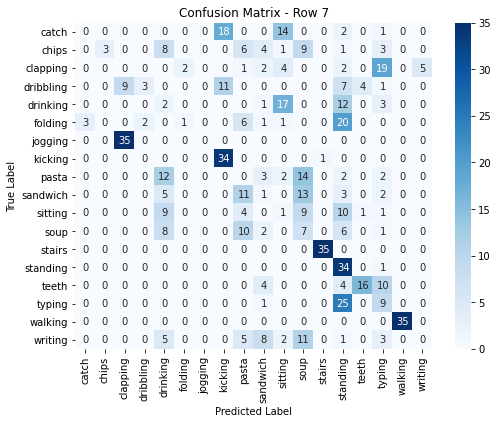

Row 8 Confusion Matrix:
[[24  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  1 17  3  0  0  4  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  1  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  2  1  1  0  5  0  0  0  1]
 [ 0  0  0  0  0 33  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  0  0  0  0  1  0  0  0  0]
 [ 0  1  0  0  0  0  0  0 31  0  0  0  0  2  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  6 14  1  0  0  5  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  3 10  5  0  0 13  0  0  0  0]
 [ 1  0  0 14  0  0  2  0  7  7  1  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0]
 [ 0  1  0  0  2  0  0  0  0  0  7  2  0 22  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  3 26  0  0  5]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0]
 [ 0  0

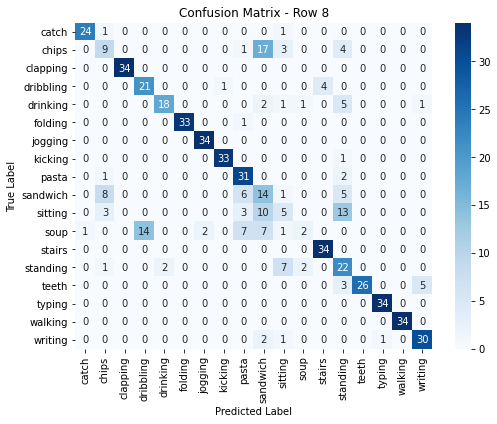

Row 9 Confusion Matrix:
[[23  0  0  0  0  1  0  7  0  0  0  0  2  1  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  4 11  1  1  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  2  2  1  2  0 16  0  0  0  0]
 [ 0  0  0  0  0 30  0  1  0  0  0  0  2  1  0  0  0  0]
 [ 0  0  0  0  0  2 30  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  0  0  0  0  1  0  0  0  0]
 [ 0  7  0  0  0  0  0  0 23  0  0  2  0  2  0  0  0  0]
 [ 0 10  0  1  0  0  0  0  3 19  0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  1  7  0  0 24  0  1  0  0]
 [ 0  7  0  0  0  0  0  0  0 10  0 17  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0 31  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 33  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  1  0 32  0  0]
 [ 0  0  0  1  0  2  0  0  0  0  0  0  6  0  0  0 25  0]
 [ 0  0

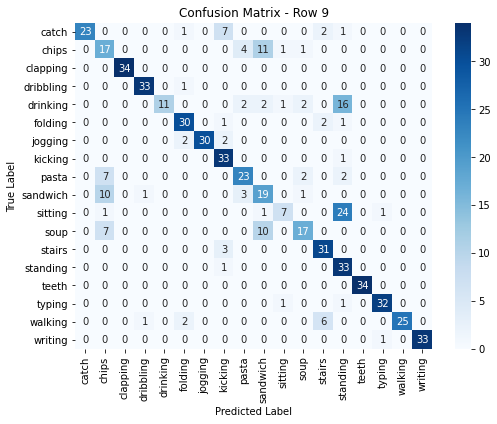

Row 10 Confusion Matrix:
[[31  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  3  0  0 15  1  0  5  0  0  0  0  0  0]
 [ 0  0  6  3  0  0  0  0  1  0  0  0 21  0  0  1  1  1]
 [ 0  0  1 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 33  0  0  1  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  3 21  1  2  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2 31  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  1 16  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0]
 [ 0  

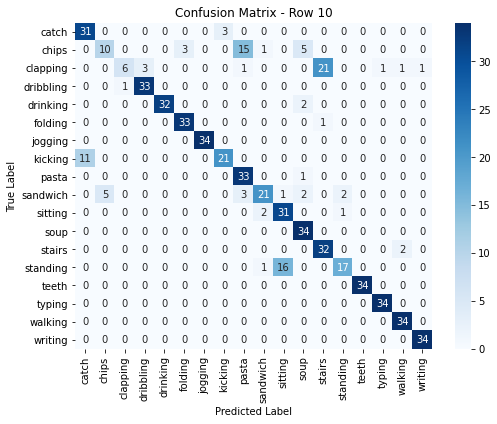

Row 11 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  1  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0 31  0  1  0  0  0  0  0  0  0]
 [ 0  4  0  0 10  0  0  0  1 12  0  5  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 13  0  0 21  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 33  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 30  0  4]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0 33  0]
 [ 0  

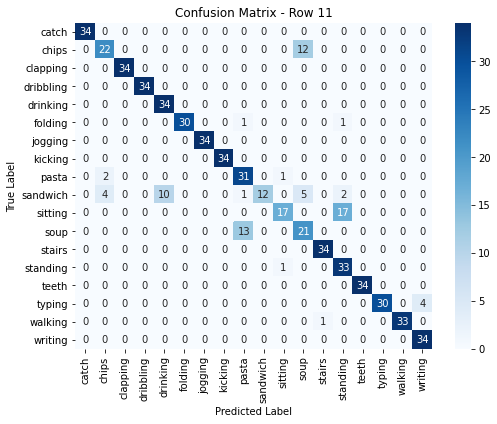

Row 12 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  1  0  0  4  2  0  2  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0 33  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 33  1  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  4  0  0  0  2 18  1  1  0  1  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0 10  0  0 23  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0 23  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0]
 [ 0  1  0  0  1  0  0  0  2  1  2  1  0 24  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 32  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0]
 [ 0  

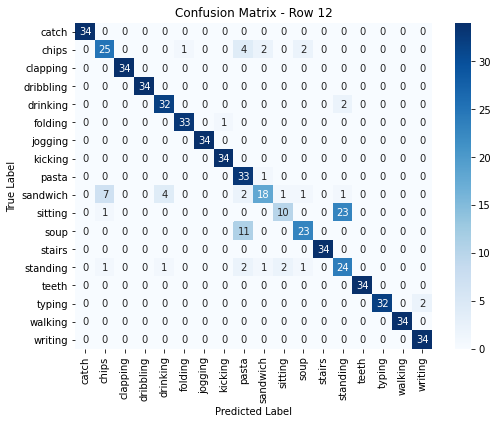

Row 13 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  1  0  0  0  2  5  1  6  0  2  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  7  0  0  0  0 13  2  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  3 24  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  1  2  1  0  0 28  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0 33  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0 33  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0 33  0]
 [ 0  

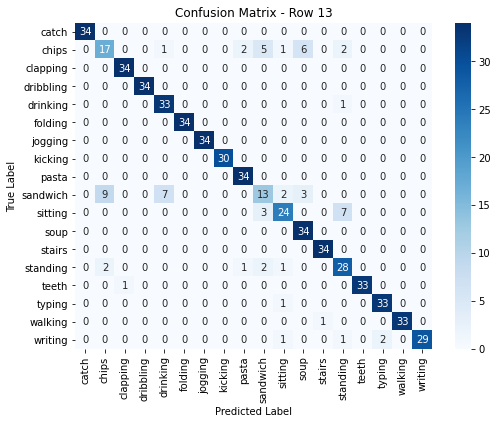

Row 14 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0 21  0  0  4  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  1  1  0  0  6  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  1  9  0  2  0  4  0  0  0  0]
 [ 0  0  0  0  0 31  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 27  0  0  3  0  0  0  0  0  0]
 [ 0  1  0  0  3  0  0  0  0 21  2  1  0  3  0  0  0  0]
 [ 0  1  0  0  1  0  0  0  0  0 22  0  0 10  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  1  0  0 32  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  7  0  0  0  0 24  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  3 28  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0  0 31  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0 33  0]
 [ 0  

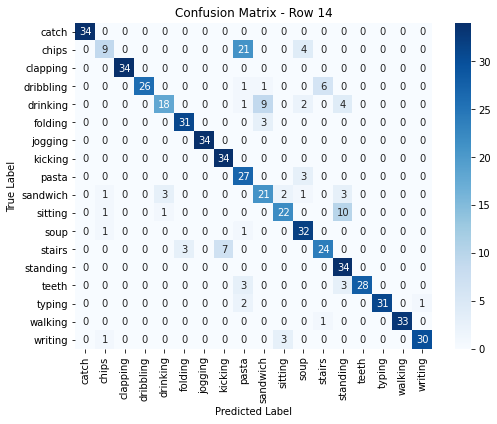

Row 15 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  1  1  0  0  1  7  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0 13  0  0  0  2  4  2  6  0  6  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  0 32  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 33  1  0  0  0  0  0  0  0  0]
 [ 1 18  0  1  0  0  0  0  6  2  2  2  1  1  0  0  0  0]
 [ 0  2  0  0  0  4  0  0  5  4 11  1  3  0  3  1  0  0]
 [ 0  6  0  0  0  0  0  0  2  1  1 24  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  2  0  0  0  0 30  0  0  0  1  0]
 [ 1  0  0  1  0  0  0  5  1  0  3  0  2 21  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1 32  0  0  1]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0 33  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  1  0  0 31  0]
 [ 0  

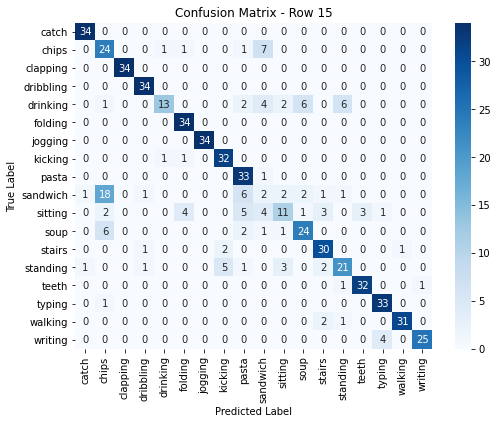

Row 16 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  2  7  0  6  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  2  0  0  8  0  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  6  0  0  0  8  9  0  9  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0 12  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  7  0  0 23  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  5  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0 30  0  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0 33  0]
 [ 0  

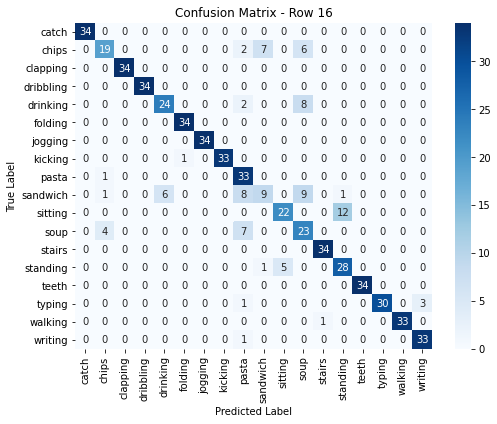

Row 17 Confusion Matrix:
[[30  0  0  2  0  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  3  1  0  0  0  0  0  0  0  1]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0 29  0  0  0  1  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0 25  1  0  4  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  4  8  0  1  0  0  0  0  0  0]
 [ 0  3  0  0  1  3  0  0  1  4 19  0  0  2  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0]
 [ 0  2  0  0  5  0  0  1  9  4  5  0  0  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0  0 28  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 27  0  7]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0]
 [ 0  

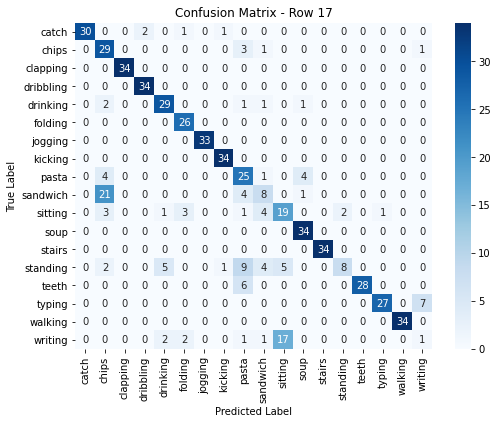

Row 18 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  7  1  0  1  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0 13  0  0  0  0  5  0  9  0  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 27  0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  1 21  4  1  0  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  8  1  0 20  4  0  0  0]
 [ 0  1  0  0  0  0  0  0  4  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0]
 [ 0  

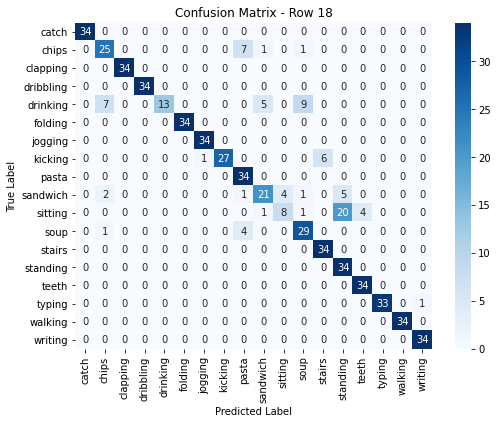

Row 19 Confusion Matrix:
[[32  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0 20  1  1  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  1  0  0 12  0  0  0  3  0  3  3  0 11  1  0  0  0]
 [ 1  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  0  0  0  0  1  0  0  0  0]
 [ 0  1  0  0  0  0  0  0 29  1  0  2  0  1  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  3 14  0  6  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  7  0  0 26  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  6  7  0 12  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0 32  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 29  4  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  1  0 32  0  0]
 [ 0  0  0  1  0  2  0  0  0  0  0  0  4  0  0  0 27  0]
 [ 0  

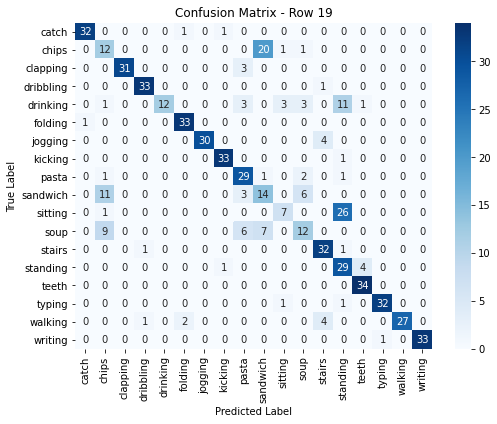

Row 20 Confusion Matrix:
[[33  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  2  0  0 14  2  0  2  0  0  0  0  0  0]
 [ 0  0  7  3  0  0  0  0  4  0  0  0 20  0  0  0  0  0]
 [ 0  0  1 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 31  0  0  0  0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  1 17  1  5  0  1  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  3 11  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0 33  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  2  0]
 [ 0  1  0  0  0  0  0  0  0  1  3  0  0 29  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0]
 [ 0  

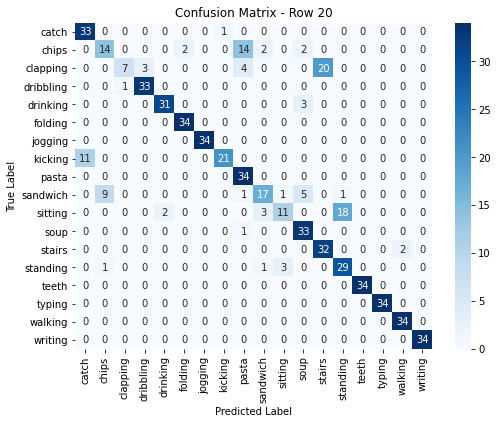

Row 21 Confusion Matrix:
[[35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  1  0  0  0  4  4  2  3  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  0  2  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0 23  1  0  4  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0 23  2  2  0  3  0  1  0  0]
 [ 0  0  0  0  1  1  0  0  0  0 30  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0 34  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  2  0  0  0  0 29  0  0  0  2  0]
 [ 0  1  0  0  0  0  0  0  0  0  2  0  0 31  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35  0]
 [ 0  

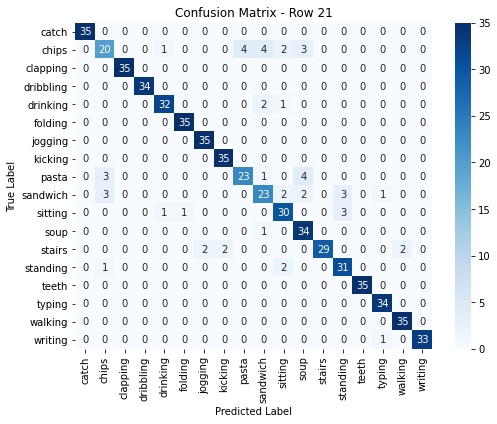

Row 22 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  5  2  0 18  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  1  0  0  0 17  3  0  3  0  4  0  0  0  0]
 [ 0  6  0  0  6  0  0  0  0 19  0  4  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0 16  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0 32  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0  0  0 31  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0]
 [ 0  

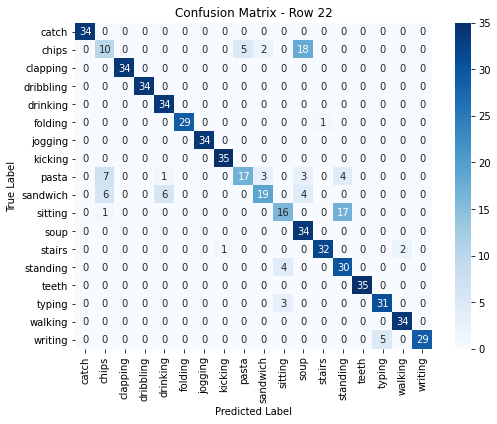

Row 23 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  7  1  0  0  1  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0 16  0  0  0  0  2  7  2  0  5  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 33  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0 32  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  2  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  2  0  0  0  0  2  5  0  1  0  1  4  1  0  0]
 [ 0  0  0  0  0 11  0  0  5  4  6  0  0  2  3  3  0  0]
 [ 0  3  0  0  3  0  0  0  1  4  1 21  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  4  0  0  0  0 27  0  0  0  3  0]
 [ 0  0  0  0  1  0  0  6  0  0  3  0  0 24  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0 29  3  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0 33  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0 32  0]
 [ 0  

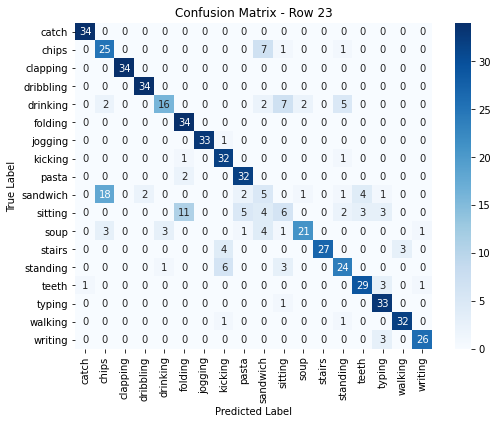

Row 24 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  3  0  0  0  1  8  0  1  0  1  1  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  1  3  0  7  0  1  0  0  0  0]
 [ 0  1  0  0  0 31  0  0  0  0  0  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  1  0 31  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0 29  0  0  1  0  3  0  0  0  0]
 [ 0  6  0  0  1  0  0  0  0 10  0 17  0  0  0  0  0  0]
 [ 0  2  0  0  0  7  0  1  1  2  5  2  0  2  1  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  1  0 22  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  2  0]
 [ 0  1  0  0  2  0  0  0  0  1  1  0  0 22  0  1  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  1  0  1  0  0  0  1  0  0  0  0  0  0 29  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0]
 [ 0  

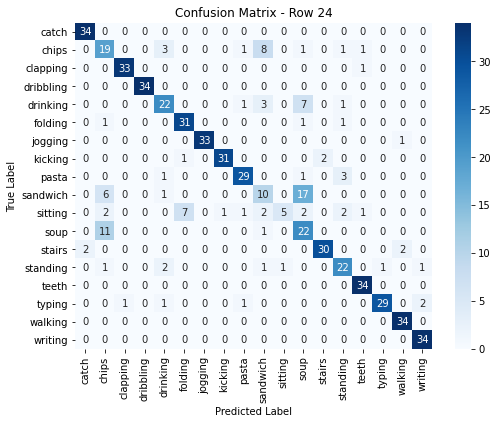

Row 25 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  1  7  2  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0 11  0  0  0  0  0  0]
 [ 0 15  0  0  3  0  0  0  0 13  3  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0 31  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  4  1  0 28  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0 25  0  0  8  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0  0 30  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0]
 [ 0  

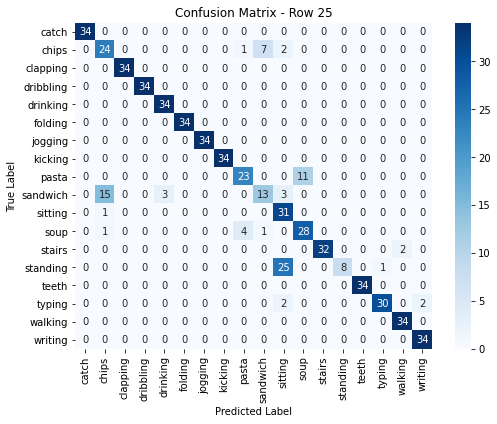

Row 26 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  2  0  0  0  1  3  1  7  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0 27  0  0  0  1  1  3  1  0  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0 33  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0 14  0  0  0  2  2  4  5  0  2  0  0  0  0]
 [ 0  3  0  0  1  3  0  0  2  0 21  2  0  2  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0 28  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  1  0 11  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 27  0  7]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0]
 [ 0  

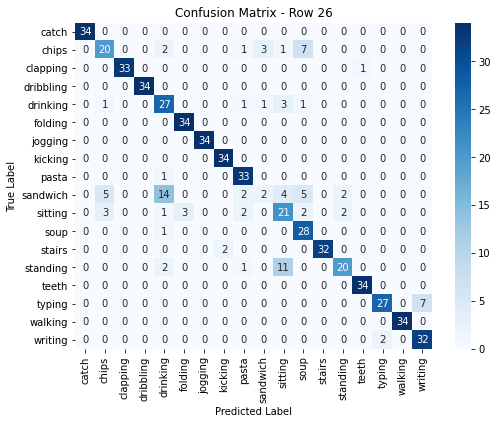

Row 27 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0 12  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0 22  1  0  5  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  2 15  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2 31  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  3 10  0  0 18  0  0  0  0]
 [ 0  2  1  0  0  0  0  0  0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 30  0  4]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0]
 [ 0  

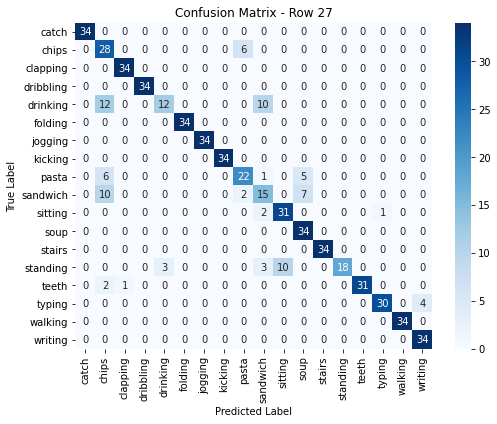

Row 28 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  1  0  2  5  0  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  7  8  1  2  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 33  0  0  0  0  1  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0 33  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0 31  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  3 21  0  0  9  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 31  0  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0]
 [ 0  

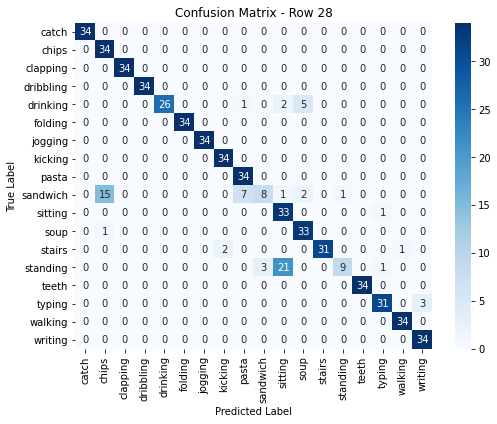

Row 29 Confusion Matrix:
[[28  0  0  0  0  0  0  5  0  0  0  0  1  0  0  0  0  0]
 [ 0  1  0  0  4  0  0  0  0  3 21  0  0  3  0  0  0  2]
 [ 0  0 33  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  2  0  0  0  0  7  9  0  0  7  0  0  0  1]
 [ 0  0  0  0  0 31  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  2  1  0  0  1  0]
 [ 0  1  9  2  0  0  0  0  5  2  7  0  0  4  0  3  0  1]
 [ 0  2  0  0  0  0  0  0  1  1 23  0  0  6  1  0  0  0]
 [ 0  6  0  0  2  0  0  0  0 12 12  0  0  2  0  0  0  0]
 [ 0  6  0  0  2  0  0  0  0 10  4  4  0  7  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  2  2  0  1  0  0 26  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 32  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0]
 [ 0  

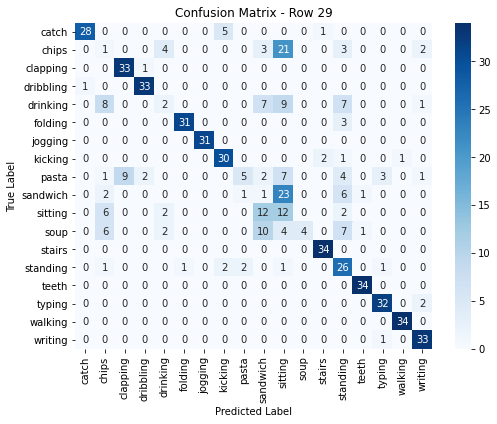

Row 30 Confusion Matrix:
[[30  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  2  0  0 14  1  0  3  0  0  0  0  0  0]
 [ 0  0 30  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0 26  0  0  0  0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 27  0  0  7  0  0  0  0  0  0]
 [ 0  8  0  0  5  0  0  0  0 16  0  2  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2 32  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0 28  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  2 11  0  0 21  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0]
 [ 0  

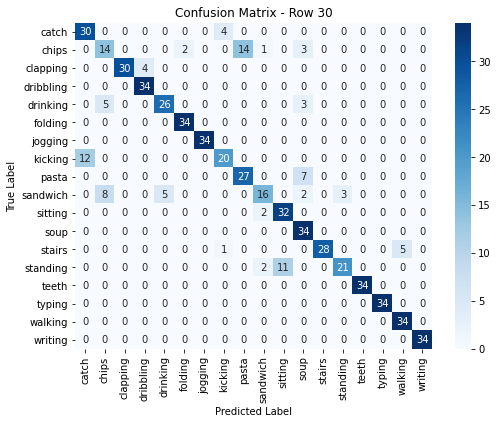

Row 31 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  5  0  1  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 28  0  0  0  0  1  1  2  0  2  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0 27  4  1  1  0  0  0  0  0  0]
 [ 0  4  0  0  4  0  0  0  0 19  6  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0  0 25  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  6  0  0 26  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  2  1  1  0  0 26  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0 29  0]
 [ 0  

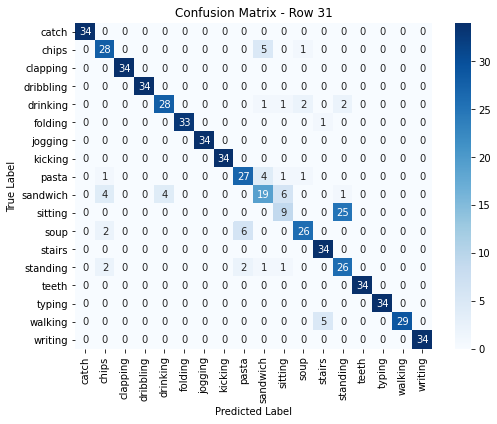

Row 32 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  1  1  4  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0 14  0  0  0  8  1  4  0  0  0  0  0  0  0]
 [ 0  0  0  1  0 30  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2 30  0  0  0  0  2  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0 28  0  0  0  0  2  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  8  4  0  0  3  0  0  0  0]
 [ 0  2  0  0  0  1  0  0  0  0 27  0  0  4  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  7  1  1 17  0  1  0  0  0  4]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  6  4  0  0 21  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0  0 27  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0 28  0]
 [ 0  

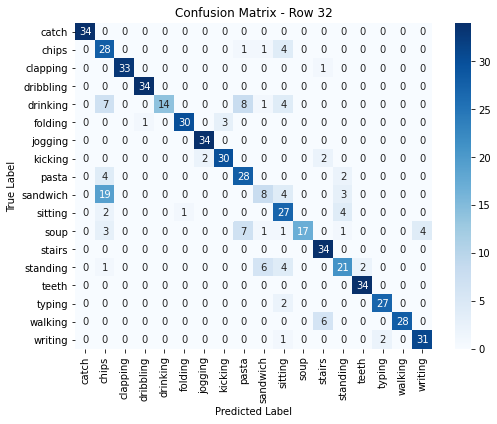

Row 33 Confusion Matrix:
[[35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  4  8  2  0  0  1  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0 10  0  0  0  0  8  1 11  0  1  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0  0  0  0  1  0  0  0  0]
 [ 0  6  0  0  0  0  0  0 25  2  0  2  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  4 20  0  0  0  0  0  0  0  0]
 [ 1  8  0  0  0  0  0  0 15  4  4  0  0  2  0  0  0  0]
 [ 0  5  0  0  0  0  0  0 12  8  0  7  0  3  0  0  0  0]
 [ 1  0  0  1  0  4  0  4  0  0  0  0 24  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0 14  0  0 19  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  5  0 29  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35  0]
 [ 0  

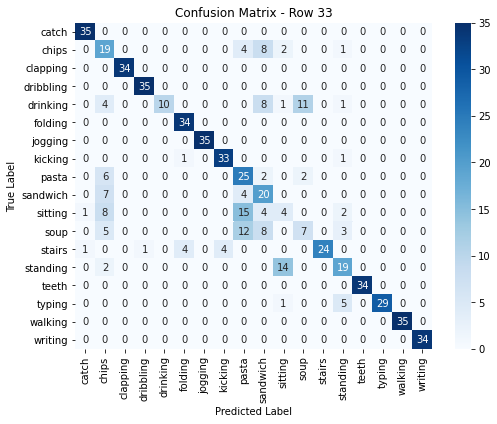

Row 34 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  6  5  0 10  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 32  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  1  0  0  0  0  0]
 [ 0  5  0  0  1  0  0  0 13  6  0  5  0  5  0  0  0  0]
 [ 0  1  0  0  5  0  0  0  3 18  0  8  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0 14  0  0 18  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  4  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0 31  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0  0  0 31  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 28  0  0  0  6  0]
 [ 0  

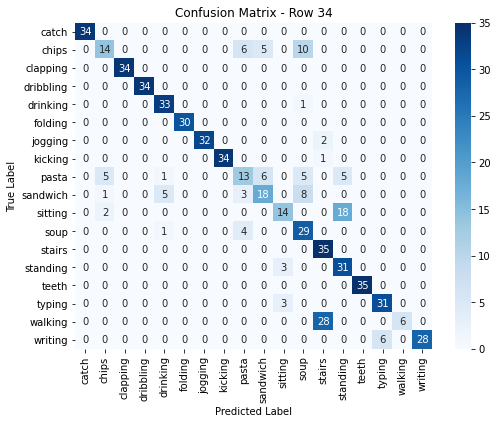

Row 35 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  1 12  0  1  0  3  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 23  0  0  0  0  1  4  5  0  1  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0 16  9  1  0  0  6  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0 21  0  1  0  6  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  1 22  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  1  0 32  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  4  0  0  0  0 23  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 18  0  0  5  0 11  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0 31  0]
 [ 0  

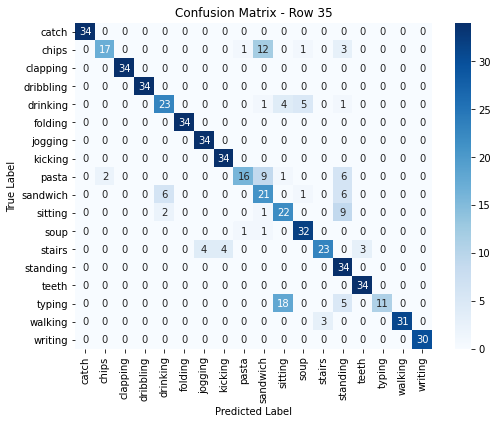

Row 36 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  9  2  2  2  0  1  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0 27  0  0  0  0  4  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0 22  0  0  9  1  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 31  0  0  2  0  1  0  0  0  0]
 [ 0 10  0  0  1  0  0  0  2 13  6  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  6  0  0 24  0  0  0  2]
 [ 0  4  0  0  0  0  0  0  2  0  0 28  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0 33  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0]
 [ 0  

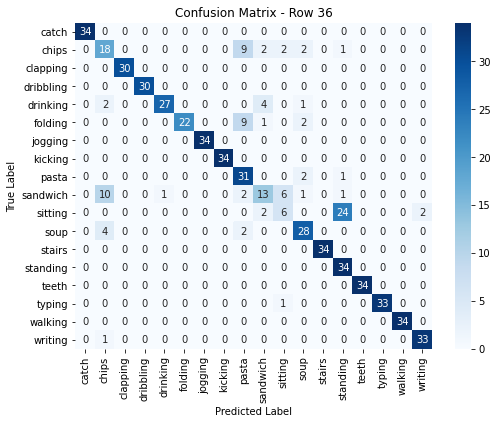

Row 37 Confusion Matrix:
[[25  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  3  6  1  1  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0 17  0  0  0  1  2  7  0  0  5  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0 16  3  0  0  7  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0 29  0  0  1  0  2  0  0]
 [ 0  9  0  0  0  0  0  0  0  1  0 24  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 29  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0 12  0  0 22  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0 33  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0]
 [ 0  

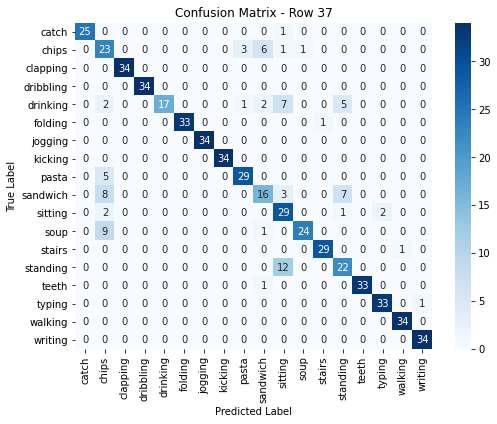

Row 38 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0 11  1  1  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0 10  0  0  0  0  8  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4 26  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  0 13  3  0  0 11  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  9  0  0 21  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0 32  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 31  0  0  0  3  0]
 [ 0  

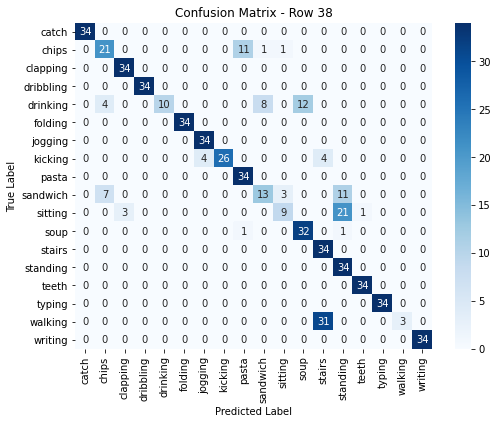

Row 39 Confusion Matrix:
[[32  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  5 12  1  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0 32  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0 15  0  0  0  2 10  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  1  0  0  0 18  4  4  1  0  0  0  0  0  3]
 [ 0  8  0  0  0  0  0  0  2 18  4  0  0  2  0  0  0  0]
 [ 0  3  0  0  1  0  0  0  0  3 26  0  0  1  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0 32  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  6  7  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0  0 32  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0 33  0]
 [ 0  

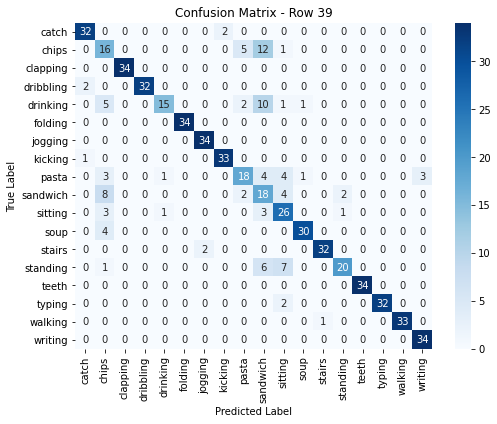

Row 40 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  1 11  0  2  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0 31  0  0  1  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0 23  0  0  0  0  5  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0 24  6  0  2  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  8 12  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0 30  0  0  3  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  4  1  0 23  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  1  0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 11  0  0 22  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  1  0 31  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0 18  0]
 [ 0  

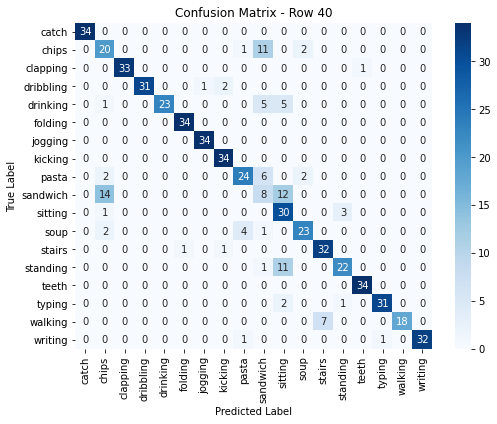

Row 41 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  2 17  0  1  0  1  0  0  0  0]
 [ 0  0 25  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  1  1  0  0 14  3  0  5  0  2  0  1  0  0]
 [ 0  2  0  0  0  0  0  0  2 22  0  4  0  4  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 32  0  0  2  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  2  3  1 26  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  1  0  0  0  0 31  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  3  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 30  0  4]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0 33  0]
 [ 0  

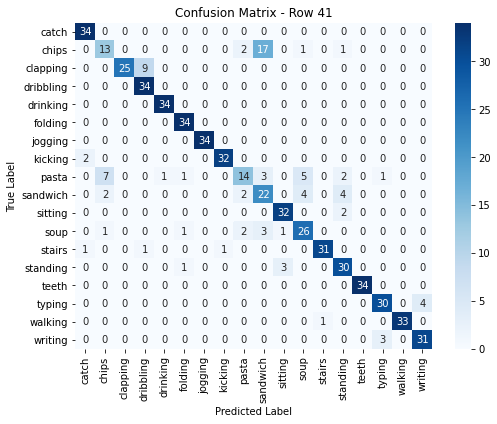

Row 42 Confusion Matrix:
[[35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  2  0  0  0  2  9  0  1  0  3  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 23  0  0  0  0  8  0  1  0  3  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0 32  0  0  0  0  0  1  0  0  0  0]
 [ 0  7  0  0  0  3  0  0 24  1  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  6 20  0  1  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0 15  8  8  1  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  9  7  1 14  0  2  0  0  0  0]
 [ 0  0  0  4  0  6  0  5  0  0  0  0 17  0  0  0  2  0]
 [ 0  2  0  0  0  0  0  0  0  3 13  0  0 16  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  5  0 29  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35  0]
 [ 0  

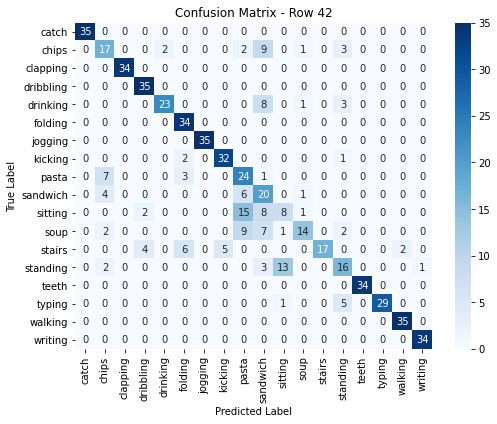

Row 43 Confusion Matrix:
[[30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  1  5  0  0  3  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 12  1  0  2  2  1  0  2  1  0  0  0  2  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0 31  0  0  0  0  0  1  0  0  0  0  0]
 [ 1  0  0  1  0  0  0 31  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0 15  0  2  0  0  0  0  0  0  0]
 [ 0  2  0  0  0 31  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  2 22  0  0  8  0  0  0  1]
 [ 3  5  0  7  3  5  0  1  0  9  1  0  0  0  0  0  0  0]
 [ 3  0  0  6  0  2  0  7  0  0  0  0 14  2  0  0  0  0]
 [ 0  1  0  0  2  0  0  0  0  1 10  0  0 20  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0  0  0 26  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0 32  0]
 [ 0  

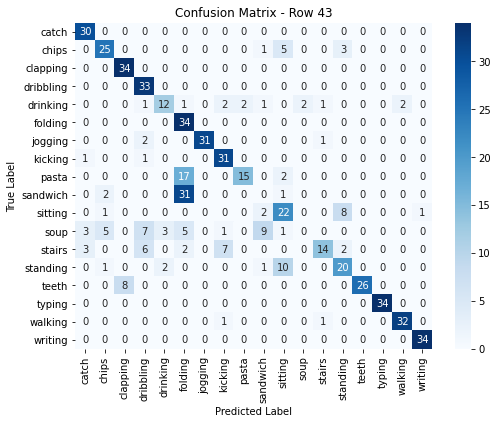

Row 44 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  4  0  0  9  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0  0  0  0  0  2  0  1  0  0  0]
 [ 0  1  0  0 27  0  0  0  0  1  0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0 31  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  0 21  1  0  6  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0 22  1  0  0  4  0  0  0  1]
 [ 0  0  0  0  1  0  0  0  0  0 29  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0 32  0  1  0  0  0  0]
 [ 0  0  0  1  0  4  0  6  0  0  0  0 23  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0  0 25  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2 32  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0 33  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0 33  0]
 [ 0  

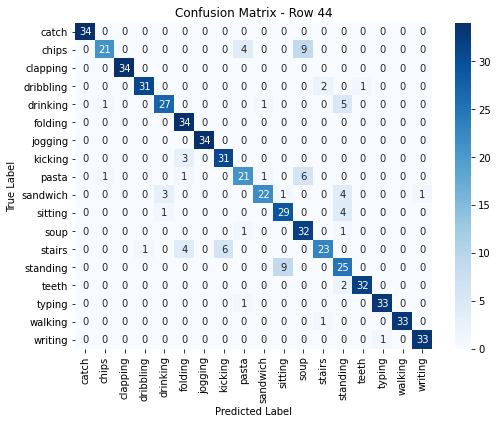

Row 45 Confusion Matrix:
[[33  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  4  4  2  7  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 25  0  0  7  0  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 30  0  0  3  0  1  0  0  0  0]
 [ 0  4  0  0  5  0  0  0  4 14  5  0  0  1  0  0  0  1]
 [ 0  0  0  0  1  0  0  0  0  2 14  0  0 15  0  1  0  1]
 [ 0  0  0  0  1  0  0  0  0  0  0 33  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0]
 [ 0  

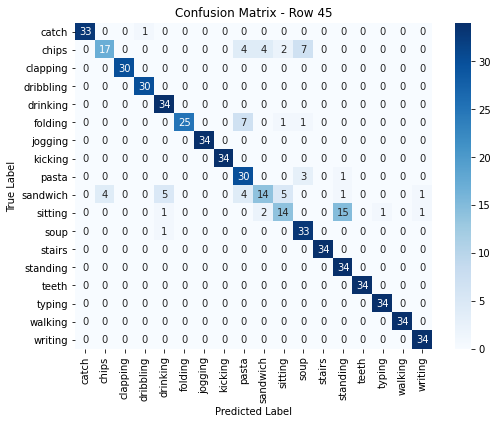

Row 46 Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  6  1  0  0  1  7  1  3  0  2  1  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0 17  0  0  0  1  3  0  9  0  3  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 32  0  0  2  0  0  0  0  0  0]
 [ 0  3  0  0  7  0  0  0  2 11  1  9  0  1  0  0  0  0]
 [ 0  1  0  0  1  7  0  0  0  1  6  1  0  5  1  0  0  0]
 [ 0  5  0  0  4  0  0  0  0  0  0 25  0  0  0  0  0  0]
 [ 1  0  0  3  0  1  0  2  0  0  0  0 26  0  0  0  1  0]
 [ 0  1  0  0  0  0  0  0  0  1  1  0  0 26  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0 14  0  0  0  0  0  5  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0 33  0]
 [ 0  

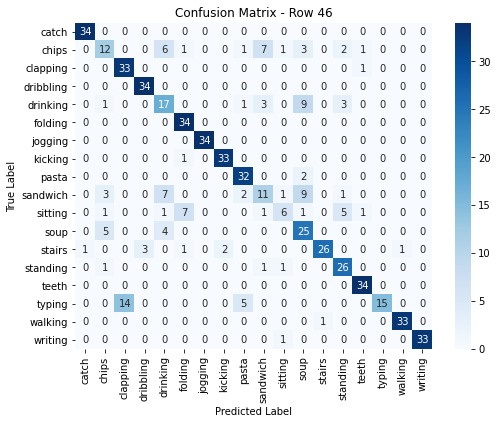

Row 47 Confusion Matrix:
[[ 9  0  0  1  0  0  0  0  0  0  3  0  0  0  0 22  0  0]
 [ 0  1  0  0  1  0  0  0  3  1 20  3  0  0  0  2  0  3]
 [ 0  0  7  0  0  0  0  0  0  1  5  0  0  0 22  0  0  0]
 [ 0  0  0  2  0 11  0  0  1  0  2  0  0  7 11  0  0  1]
 [ 0  4  0  0  0  0  0  0 16  1 11  2  0  0  0  0  0  1]
 [ 0  0  0  0  0 15  0  0  0  0 15  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  1  0  0  0 32  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0 21  1  1  8  0  0  2  1  0  0]
 [ 0  2  0  0  3  0  0  0  6  1 20  0  0  1  0  2  0  0]
 [ 0  0  0  0  1  0  0  0  0  0 33  0  0  0  0  0  0  1]
 [ 0  2  0  0  3  0  0  0 12  3  8  2  0  1  0  0  0  4]
 [ 0  0  1  2  0  0  0  0  0  0  0  0 32  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  2  0  6  6  0 17  0  0  0  3]
 [ 0  0  0  0  0  0  0  0  0  6  1  0  0  0 28  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0 17  0  0 15  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35  0]
 [ 0  

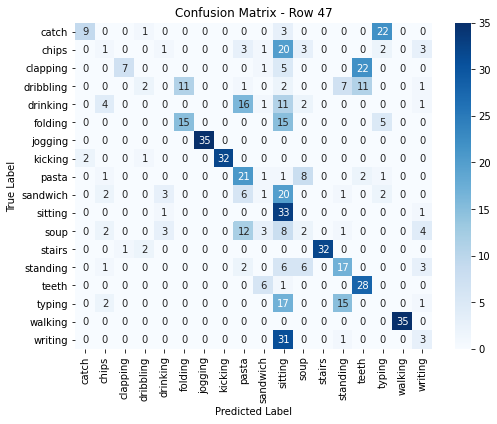

Row 48 Confusion Matrix:
[[31  0  0  1  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  1  1  0  0  0 13  4  1  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  1  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 32  1  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  1  0 32  0  0  0  0  1  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0 17  3  0  6  0  0  0  1  0  2]
 [ 0 18  0  0  1  0  0  0  0  6  1  2  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  5 10  0  0 14  0  3  0  1]
 [ 0  0  0  0  0  0  0  0  5  3  0 19  0  2  3  0  0  1]
 [ 0  0  0  0  0  0  1  4  0  0  0  0 17  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0 31  0  2]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  4  0  0  0 29  0]
 [ 0  

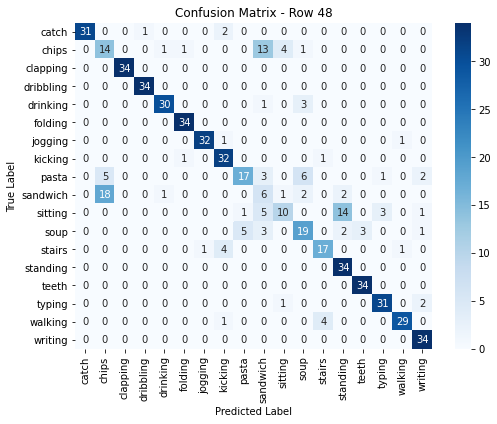

Row 49 Confusion Matrix:
[[24  0  0  1  0  2  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  1  2  0  0  2  1 10  3  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  1  4  2  1  0 16  0  0  0  0]
 [ 0  0  0  1  0 32  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 31  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0 31  0  0  1  0  0  1  0  0  0  0]
 [ 0 10  0  0  0  0  0  0 21  0  0  1  0  2  0  0  0  0]
 [ 0  7  0  0  0  1  0  0  1 25  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  9  0  0 24  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0  6  0  6  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  4  0  0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  1  0 32  0  0]
 [ 0  0  0  2  0  3  0  0  0  0  0  0  2  0  0  0 27  0]
 [ 0  

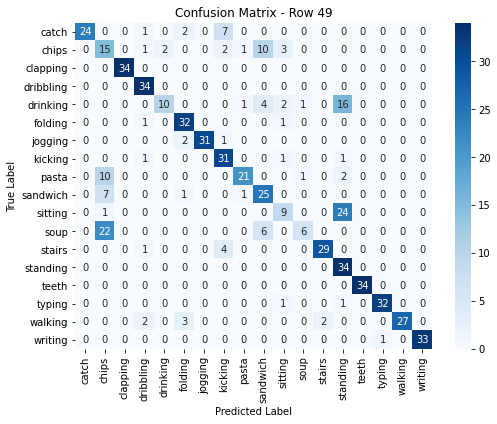

Row 50 Confusion Matrix:
[[33  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  1 13  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0 30  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 27  3  1  2  0  1  0  0  0  0]
 [ 0 18  0  0  1  0  0  0  0  2 13  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0 28  0  0  5  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  1 28  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  4  0  0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  6  0  0 27  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  1  0 32  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  2  0  0  0 21  0]
 [ 0  

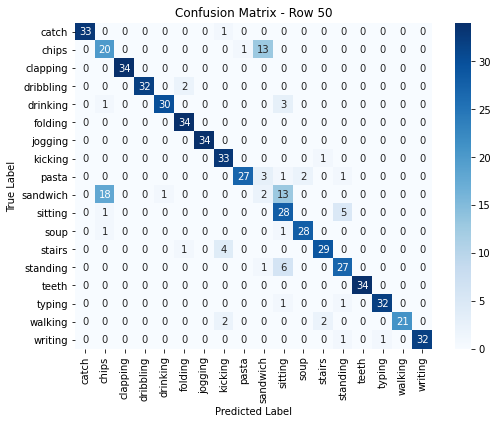

In [12]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast  # To safely parse confusion matrix from CSV (if stored as a string)

def visualize_confusion_matrices(folder_path):
    # 1️⃣ Load label mapping
    label_mapping_path = os.path.join(folder_path, "label_mapping.json")
    if not os.path.exists(label_mapping_path):
        raise FileNotFoundError(f"label_mapping.json not found in {folder_path}")

    with open(label_mapping_path, "r") as f:
        label_mapping = json.load(f)
    
    labels = list(label_mapping.keys())
    print(f"Labels: {labels}")
    # 2️⃣ Find CSV file with the longest name
    csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
    if not csv_files:
        raise FileNotFoundError("No CSV files found in the folder.")

    scores_csv = max(csv_files, key=len)
    csv_path = os.path.join(folder_path, scores_csv)
    
    
    # 3️⃣ Read CSV and extract confusion matrices
    df = pd.read_csv(csv_path)
    if "confusion_matrix" not in df.columns:
        raise KeyError("CSV file does not contain 'confusion_matrix' column.")
    # 4️⃣ Calculate the mean and std for other columns
    other_columns = df.columns[df.columns != "confusion_matrix"]  # Exclude 'confusion_matrix'
    for column in other_columns:
        mean_value = df[column].mean()
        std_value = df[column].std()
        print(f"Column '{column}' - Mean: {mean_value:.2f}, Std: {std_value:.2f}")
    
    for i, row in df.iterrows():
        try:
            raw_conf_matrix = row["confusion_matrix"]
            # print(f"Row {i+1} Confusion Matrix (raw):\n{raw_conf_matrix}\n")  # Debugging print
            # Clean up the string and convert to list of lists
            cleaned = raw_conf_matrix.replace('[', '').replace(']', '')
            rows = [list(map(int, row.split())) for row in cleaned.split()]

            # Convert to numpy array
            conf_matrix = np.array(rows).reshape(len(labels), len(labels))
            # Clean and format the confusion matrix string
            # conf_matrix_str = raw_conf_matrix.replace("\n", " ")  # Remove newlines
            # conf_matrix_str = " ".join(conf_matrix_str.split())  # Remove extra spaces
            print(f"Row {i+1} Confusion Matrix:\n{conf_matrix}\n")  # Debugging print
            # conf_matrix = ast.literal_eval(conf_matrix_str)  # Convert string to list
            # conf_matrix = np.array(conf_matrix)

            # 4️⃣ Plot confusion matrix
            plt.figure(figsize=(8, 6))
            sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                        xticklabels=labels, yticklabels=labels)

            plt.xlabel("Predicted Label")
            plt.ylabel("True Label")
            plt.title(f"Confusion Matrix - Row {i+1}")
            plt.show()
        
        except Exception as e:
            print(f"Skipping row {i+1} due to error: {e}")

# Usage Example
folder_path = "/home/hossein/ssl-wearables/data/reports/2025-02-18_18-02"
visualize_confusion_matrices(folder_path)

### Cross dataset confusion matrix

Pretrained Model Labels: ['catch', 'chips', 'clapping', 'dribbling', 'drinking', 'folding', 'jogging', 'kicking', 'pasta', 'sandwich', 'sitting', 'soup', 'stairs', 'standing', 'teeth', 'typing', 'walking', 'writing']
Evaluation Dataset Labels: ['cycling', 'sedentary_lying', 'sedentary_sitting_other', 'sedentary_sitting_transport', 'upright_standing', 'upright_stepping_low', 'upright_stepping_moderate', 'upright_stepping_vigorous']
Processing /home/hossein/ssl-wearables/data/reports/2025-02-18_18-38/p3.csv
   Y_test  Y_test_pred
0       2            3
1       2           17
2       5            3
3       5           17
4       6           12
Y_test: ['sedentary_sitting_other' 'upright_stepping_low'
 'upright_stepping_moderate' 'upright_standing'
 'sedentary_sitting_transport' 'sedentary_lying']
Y_test_pred: ['dribbling' 'writing' 'stairs' 'pasta' 'clapping' 'sitting' 'drinking'
 'soup' 'walking' 'catch' 'standing' 'sandwich' 'kicking' 'folding'
 'chips']
Pivot Table:
Y_test_pred        

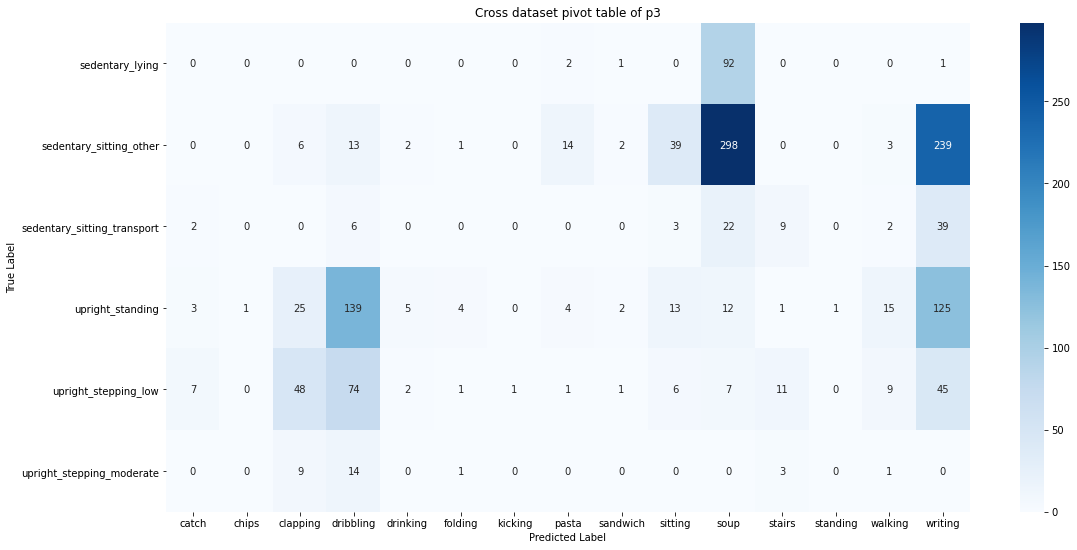

Processing /home/hossein/ssl-wearables/data/reports/2025-02-18_18-38/p9.csv
   Y_test  Y_test_pred
0       6           16
1       5            2
2       5            2
3       6           16
4       5            3
Y_test: ['upright_stepping_moderate' 'upright_stepping_low'
 'sedentary_sitting_other' 'upright_standing'
 'sedentary_sitting_transport' 'sedentary_lying']
Y_test_pred: ['walking' 'clapping' 'dribbling' 'writing' 'soup' 'sitting' 'sandwich'
 'pasta' 'stairs' 'drinking' 'typing' 'teeth' 'catch' 'kicking' 'folding']
Pivot Table:
Y_test_pred                  catch  clapping  dribbling  drinking  folding  \
Y_test                                                                       
sedentary_lying                  0         0          0         0        0   
sedentary_sitting_other          0         8         17         0        0   
sedentary_sitting_transport      5        40         25         1        0   
upright_standing                 0        16         29         1  

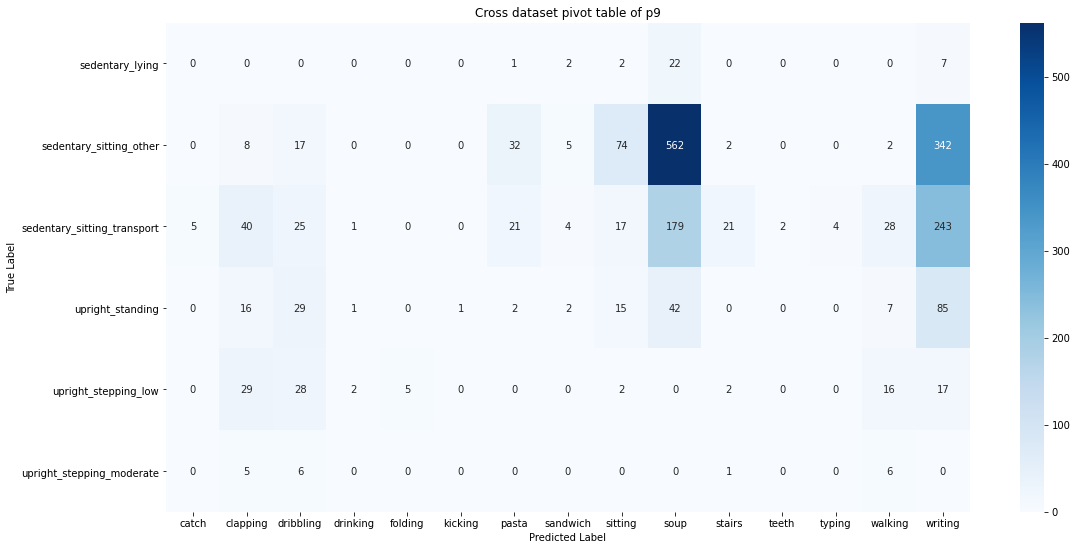

Processing /home/hossein/ssl-wearables/data/reports/2025-02-18_18-38/p2.csv
   Y_test  Y_test_pred
0       4            3
1       4            3
2       4           11
3       2            2
4       2           11
Y_test: ['upright_standing' 'sedentary_sitting_other' 'upright_stepping_low'
 'upright_stepping_moderate' 'sedentary_lying'
 'sedentary_sitting_transport']
Y_test_pred: ['dribbling' 'soup' 'clapping' 'writing' 'walking' 'pasta' 'sitting'
 'drinking' 'sandwich' 'typing' 'standing' 'folding' 'stairs']
Pivot Table:
Y_test_pred                  clapping  dribbling  drinking  folding  pasta  \
Y_test                                                                       
sedentary_lying                     0          1         0        0      5   
sedentary_sitting_other             3          9         0        0      9   
sedentary_sitting_transport         1          3         0        0      2   
upright_standing                   47         74         3        4     16   
upri

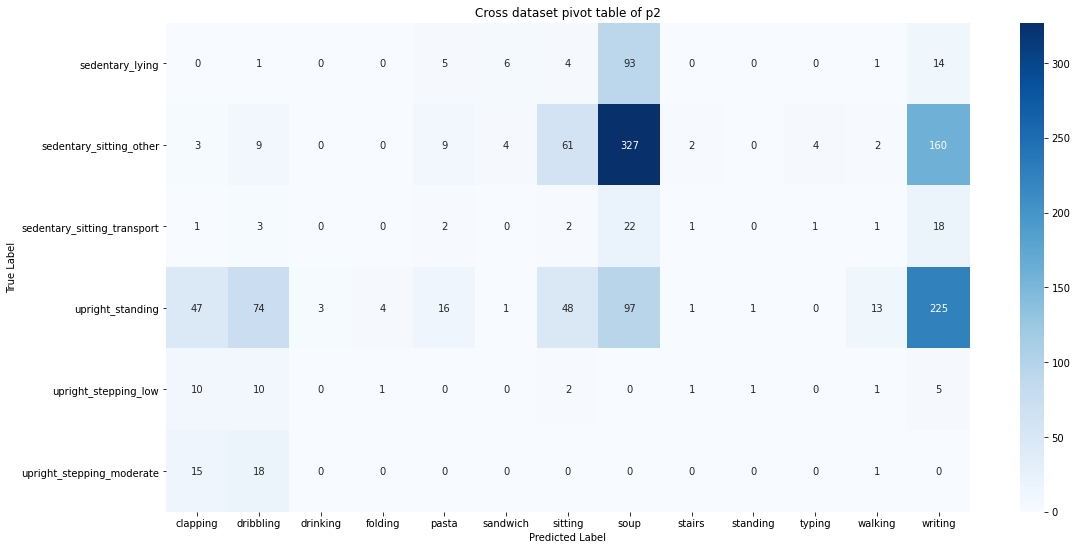

Processing /home/hossein/ssl-wearables/data/reports/2025-02-18_18-38/p12.csv
   Y_test  Y_test_pred
0       2           17
1       2           17
2       2           17
3       2           11
4       2           11
Y_test: ['sedentary_sitting_other' 'upright_standing'
 'sedentary_sitting_transport' 'upright_stepping_low']
Y_test_pred: ['writing' 'soup' 'sitting' 'dribbling' 'folding' 'clapping' 'drinking'
 'pasta' 'walking' 'stairs' 'sandwich' 'chips' 'catch' 'kicking']
Pivot Table:
Y_test_pred                  catch  chips  clapping  dribbling  drinking  \
Y_test                                                                     
sedentary_sitting_other          0      2        19         79         3   
sedentary_sitting_transport      0      0         0          6         0   
upright_standing                 0      0        10         84         1   
upright_stepping_low             1      0         1         19         0   

Y_test_pred                  folding  kicking  pasta  s

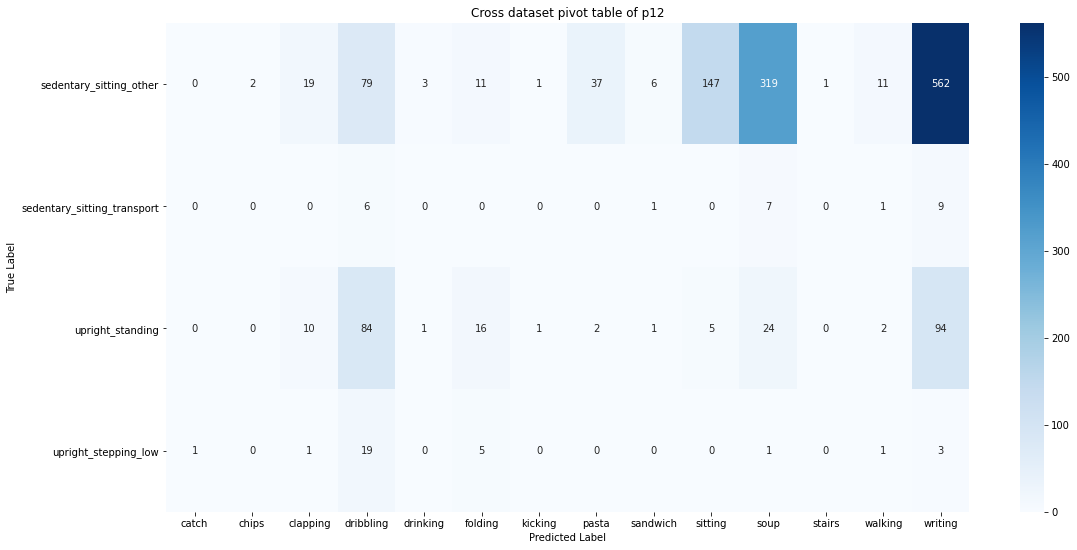

Processing /home/hossein/ssl-wearables/data/reports/2025-02-18_18-38/p8.csv
   Y_test  Y_test_pred
0       4           16
1       4           17
2       4           17
3       4            3
4       4           17
Y_test: ['upright_standing' 'sedentary_sitting_other' 'upright_stepping_low'
 'upright_stepping_moderate' 'sedentary_sitting_transport']
Y_test_pred: ['walking' 'writing' 'dribbling' 'clapping' 'soup' 'stairs' 'sitting'
 'pasta' 'folding' 'typing' 'sandwich' 'catch' 'drinking' 'kicking']
Pivot Table:
Y_test_pred                  catch  clapping  dribbling  drinking  folding  \
Y_test                                                                       
sedentary_sitting_other          0        49         14         0        0   
sedentary_sitting_transport      1         6          7         0        0   
upright_standing                 1        13         33         2        1   
upright_stepping_low             0        19         11         0        7   
upright_stepping

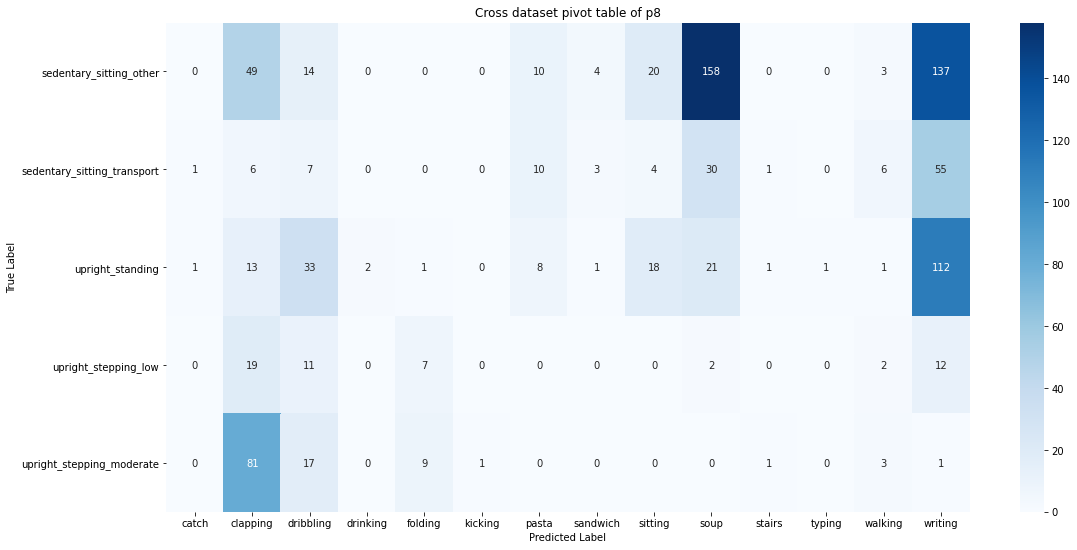

Processing /home/hossein/ssl-wearables/data/reports/2025-02-18_18-38/p1.csv
   Y_test  Y_test_pred
0       4            3
1       4           10
2       5           16
3       4            3
4       4           17
Y_test: ['upright_standing' 'upright_stepping_low' 'sedentary_sitting_transport'
 'sedentary_sitting_other' 'upright_stepping_moderate']
Y_test_pred: ['dribbling' 'sitting' 'walking' 'writing' 'folding' 'drinking' 'clapping'
 'soup' 'stairs' 'catch' 'pasta' 'sandwich' 'kicking']
Pivot Table:
Y_test_pred                  catch  clapping  dribbling  drinking  folding  \
Y_test                                                                       
sedentary_sitting_other          0         2          1         0        0   
sedentary_sitting_transport     36         8         30         0        0   
upright_standing                 0         6         95         2        6   
upright_stepping_low             0        20         67         2        8   
upright_stepping_moderate

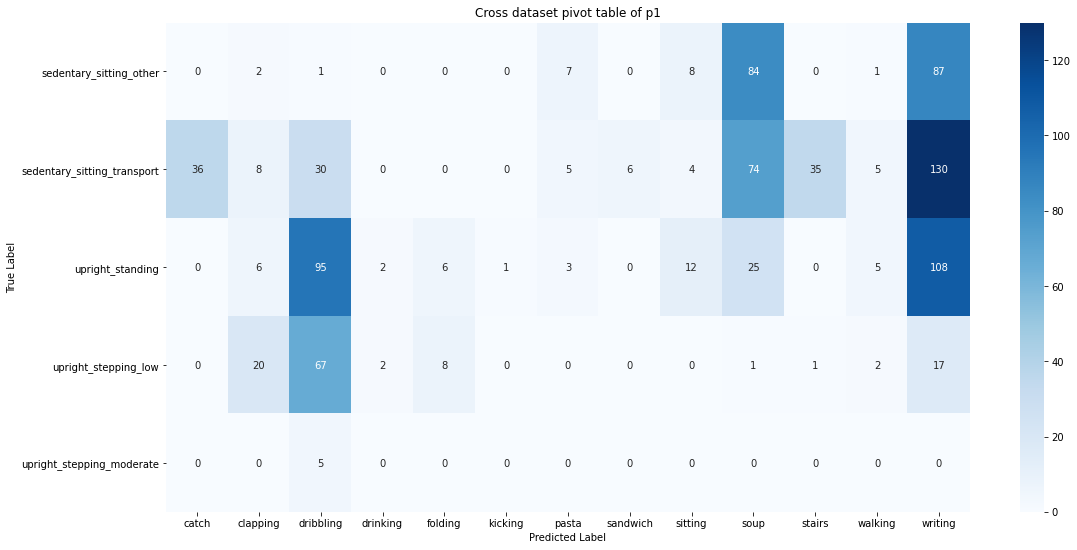

Processing /home/hossein/ssl-wearables/data/reports/2025-02-18_18-38/p10.csv
   Y_test  Y_test_pred
0       4           16
1       4           17
2       5            5
3       5           17
4       2           17
Y_test: ['upright_standing' 'upright_stepping_low' 'sedentary_sitting_other'
 'sedentary_sitting_transport']
Y_test_pred: ['walking' 'writing' 'folding' 'sitting' 'soup' 'pasta' 'drinking'
 'dribbling' 'clapping' 'stairs' 'jogging' 'catch' 'typing' 'sandwich'
 'kicking']
Pivot Table:
Y_test_pred                  catch  clapping  dribbling  drinking  folding  \
Y_test                                                                       
sedentary_sitting_other          0         2          9         8        0   
sedentary_sitting_transport      0         0          1         0        0   
upright_standing                 1         7         42         2        9   
upright_stepping_low             1         1         30         1       18   

Y_test_pred                  jo

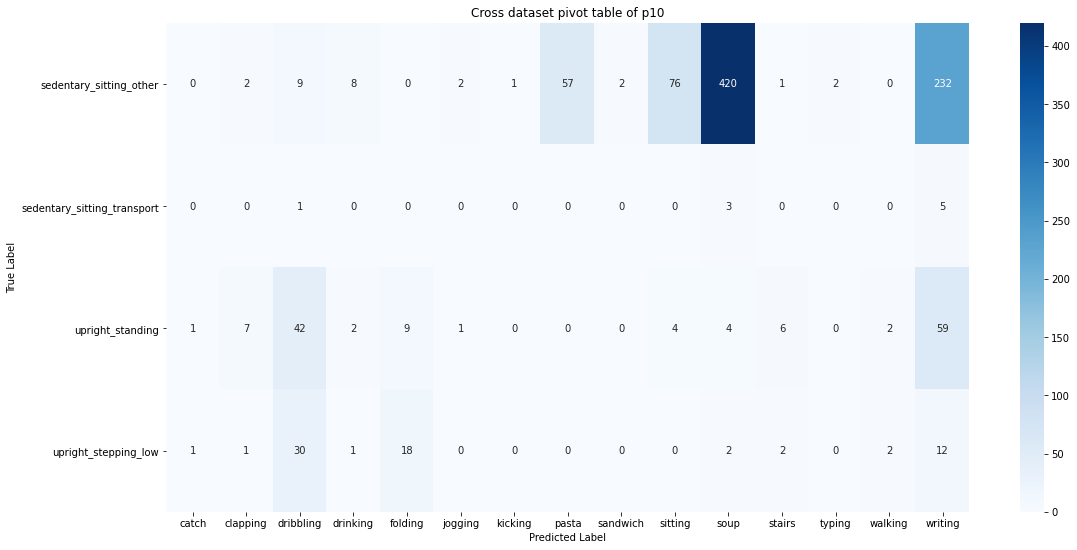

Processing /home/hossein/ssl-wearables/data/reports/2025-02-18_18-38/p13.csv
   Y_test  Y_test_pred
0       2           11
1       2           11
2       2           11
3       2           17
4       2           17
Y_test: ['sedentary_sitting_other' 'cycling' 'sedentary_lying'
 'upright_stepping_low' 'upright_standing' 'sedentary_sitting_transport'
 'upright_stepping_moderate' 'upright_stepping_vigorous']
Y_test_pred: ['soup' 'writing' 'pasta' 'walking' 'catch' 'dribbling' 'stairs' 'sitting'
 'drinking' 'folding' 'clapping' 'sandwich' 'standing' 'jogging' 'typing']
Pivot Table:
Y_test_pred                  catch  clapping  dribbling  drinking  folding  \
Y_test                                                                       
cycling                         54         0         14         0        0   
sedentary_lying                  0         0          0         1        0   
sedentary_sitting_other          0         6         11         6        1   
sedentary_sitting_transpo

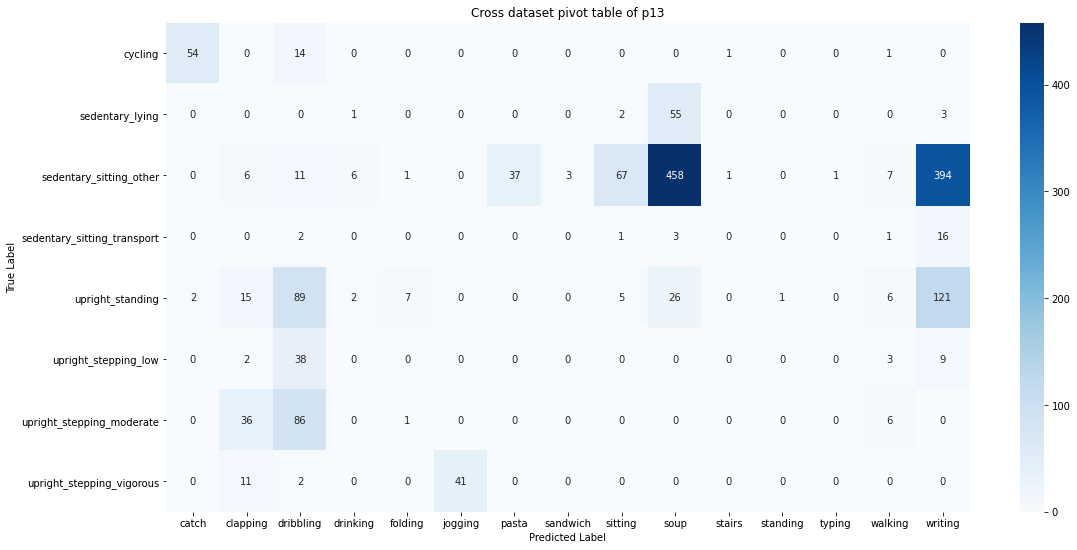

Processing /home/hossein/ssl-wearables/data/reports/2025-02-18_18-38/p6.csv
   Y_test  Y_test_pred
0       2           17
1       2            8
2       2           10
3       2           10
4       2           10
Y_test: ['sedentary_sitting_other' 'upright_standing' 'upright_stepping_low'
 'sedentary_sitting_transport' 'upright_stepping_moderate']
Y_test_pred: ['writing' 'pasta' 'sitting' 'soup' 'drinking' 'walking' 'clapping'
 'dribbling' 'stairs' 'typing' 'jogging' 'sandwich' 'standing' 'catch'
 'kicking' 'folding']
Pivot Table:
Y_test_pred                  catch  clapping  dribbling  drinking  folding  \
Y_test                                                                       
sedentary_sitting_other          1        15         12         8        0   
sedentary_sitting_transport      3         3         12         3        0   
upright_standing                 0        78        146        34        0   
upright_stepping_low             1        31         36         7       

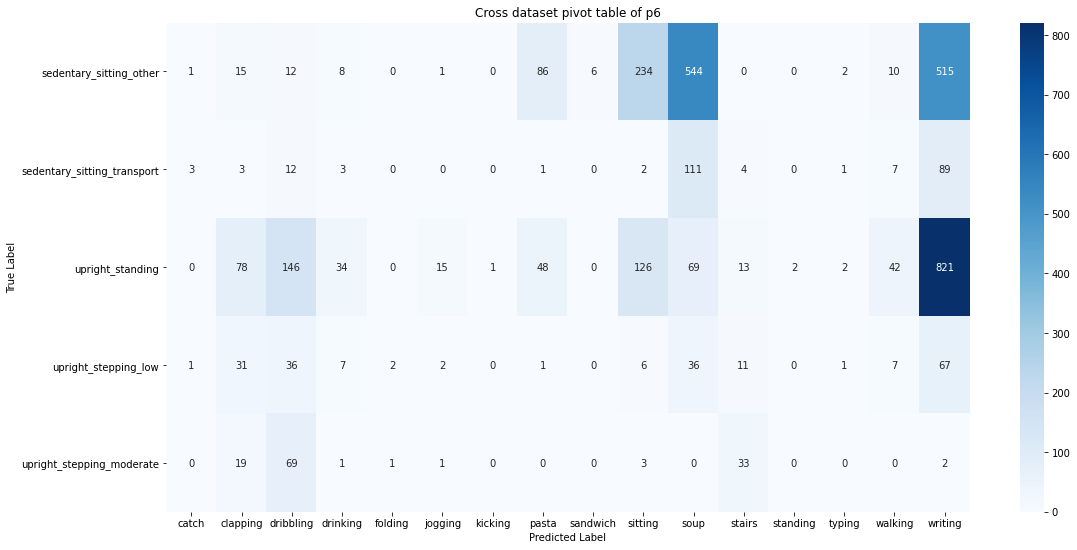

Processing /home/hossein/ssl-wearables/data/reports/2025-02-18_18-38/p7.csv
   Y_test  Y_test_pred
0       2           11
1       2           11
2       2           17
3       2           11
4       2           10
Y_test: ['sedentary_sitting_other' 'upright_standing' 'upright_stepping_low'
 'upright_stepping_moderate' 'sedentary_sitting_transport']
Y_test_pred: ['soup' 'writing' 'sitting' 'dribbling' 'kicking' 'pasta' 'clapping'
 'walking' 'drinking' 'typing' 'sandwich' 'folding' 'stairs']
Pivot Table:
Y_test_pred                  clapping  dribbling  drinking  folding  kicking  \
Y_test                                                                         
sedentary_sitting_other            22         17         7        0        1   
sedentary_sitting_transport         5          3         0        0        0   
upright_standing                   15         40         3        5        0   
upright_stepping_low                3         10         0        2        0   
upright_step

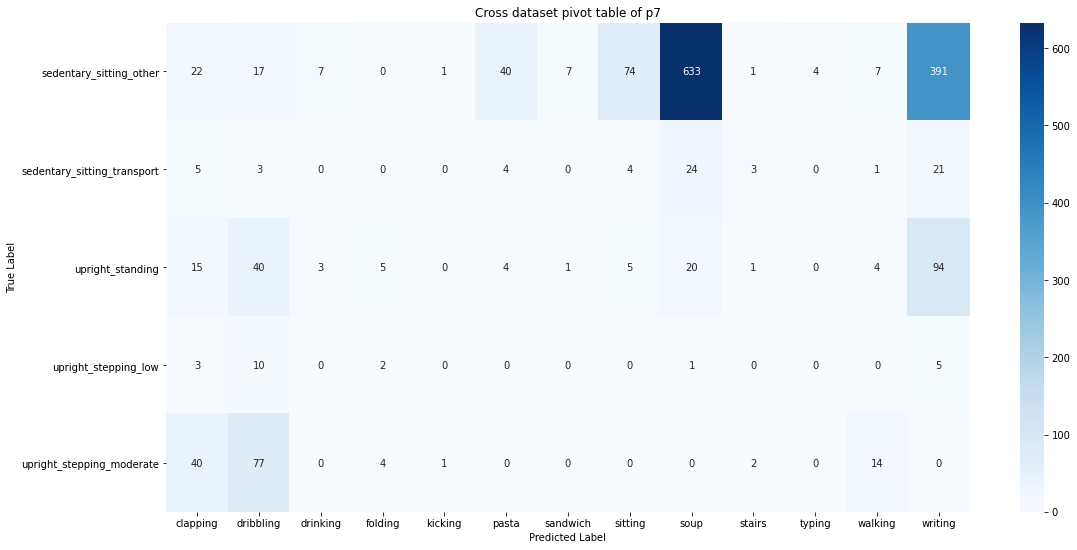

Processing /home/hossein/ssl-wearables/data/reports/2025-02-18_18-38/p5.csv
   Y_test  Y_test_pred
0       4            2
1       4            8
2       4           17
3       4            3
4       4           17
Y_test: ['upright_standing' 'sedentary_sitting_other' 'upright_stepping_moderate'
 'sedentary_sitting_transport' 'upright_stepping_low'
 'upright_stepping_vigorous']
Y_test_pred: ['clapping' 'pasta' 'writing' 'dribbling' 'soup' 'sitting' 'walking'
 'drinking' 'stairs' 'catch' 'folding' 'kicking' 'sandwich']
Pivot Table:
Y_test_pred                  catch  clapping  dribbling  drinking  folding  \
Y_test                                                                       
sedentary_sitting_other          0         5          0         3        0   
sedentary_sitting_transport      7         2          7         0        0   
upright_standing                 0        28         86         4        3   
upright_stepping_low             0        13         29         0        0

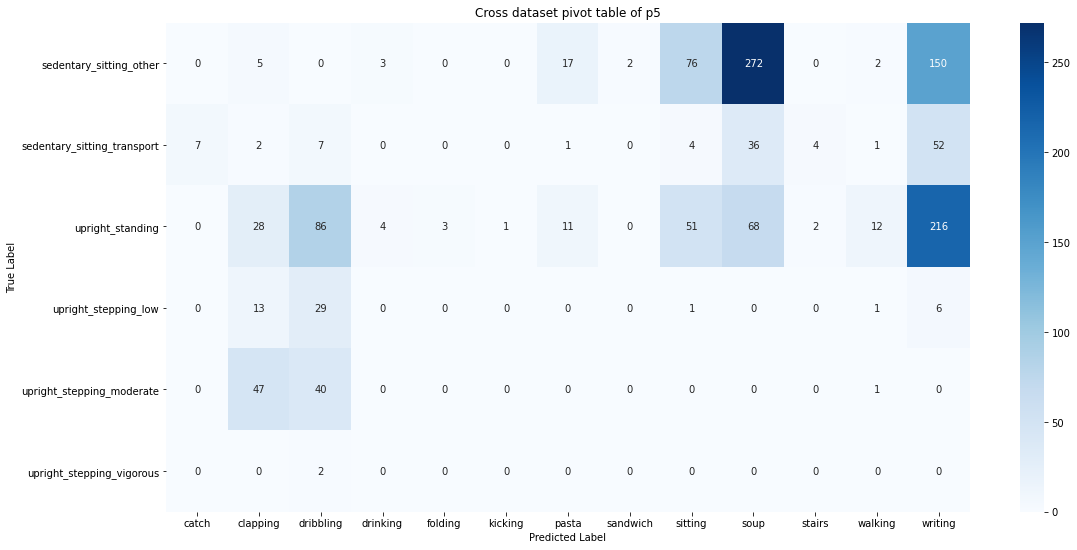

Processing /home/hossein/ssl-wearables/data/reports/2025-02-18_18-38/p4.csv
   Y_test  Y_test_pred
0       2           11
1       5            3
2       4            3
3       4           17
4       4           17
Y_test: ['sedentary_sitting_other' 'upright_stepping_low' 'upright_standing'
 'upright_stepping_moderate' 'cycling']
Y_test_pred: ['soup' 'dribbling' 'writing' 'folding' 'sitting' 'stairs' 'walking'
 'pasta' 'catch' 'drinking' 'jogging' 'typing' 'clapping']
Pivot Table:
Y_test_pred                catch  clapping  dribbling  drinking  folding  \
Y_test                                                                     
cycling                        2         0         14         0        0   
sedentary_sitting_other        0         2          4         3        0   
upright_standing               1         0         15         1        1   
upright_stepping_low           0         0         12         0        0   
upright_stepping_moderate      0         0         32      

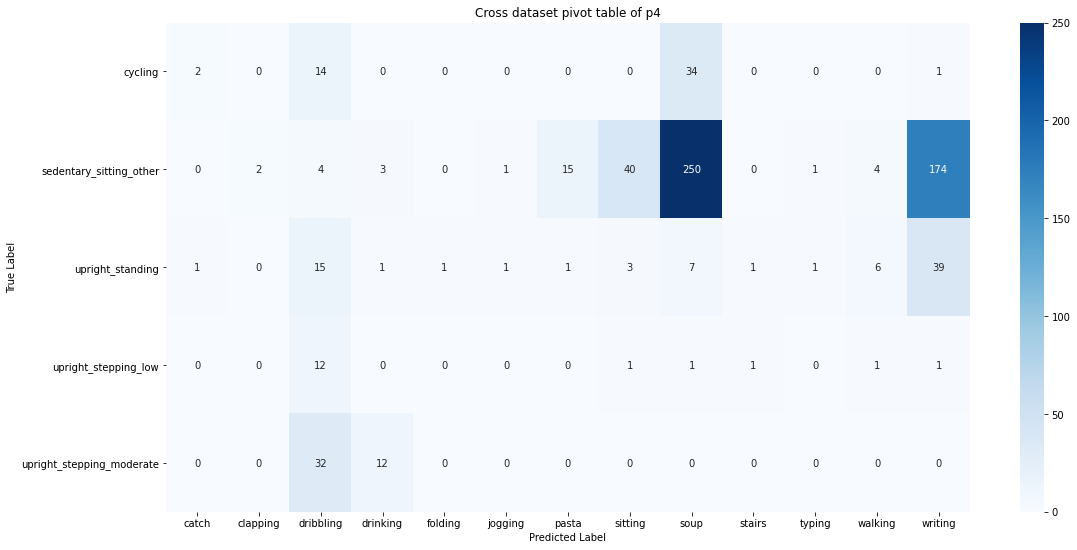

Processing /home/hossein/ssl-wearables/data/reports/2025-02-18_18-38/p11.csv
   Y_test  Y_test_pred
0       4            2
1       4           11
2       4            3
3       4            3
4       4            2
Y_test: ['upright_standing' 'upright_stepping_low' 'sedentary_sitting_other'
 'sedentary_sitting_transport']
Y_test_pred: ['clapping' 'soup' 'dribbling' 'writing' 'pasta' 'walking' 'sitting'
 'stairs' 'sandwich' 'folding' 'catch' 'kicking' 'drinking' 'chips'
 'standing']
Pivot Table:
Y_test_pred                  catch  chips  clapping  dribbling  drinking  \
Y_test                                                                     
sedentary_sitting_other          0      0         3         11         1   
sedentary_sitting_transport      1      0         0          7         0   
upright_standing                 1      1        58        156         1   
upright_stepping_low             5      0        31         65         1   

Y_test_pred                  folding  kicki

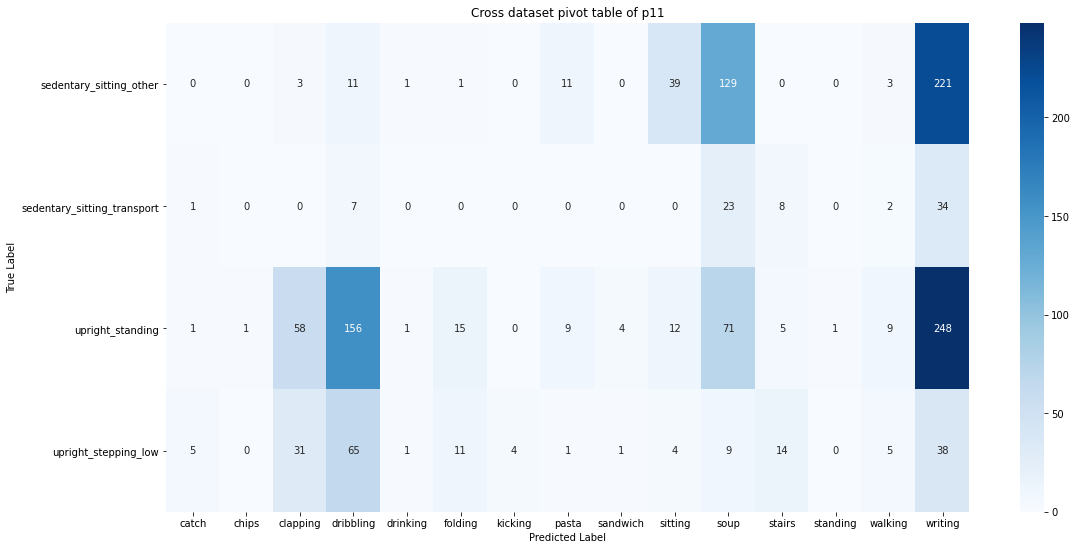

Pivot Table:
Y_test_pred                  catch  chips  clapping  dribbling  drinking  \
Y_test                                                                     
cycling                         56      0         0         28         0   
sedentary_lying                  0      0         0          1         1   
sedentary_sitting_other          1      2       142        197        41   
sedentary_sitting_transport     55      0        65        109         4   
upright_standing                 9      2       318       1028        61   
upright_stepping_low            15      0       208        429        15   
upright_stepping_moderate        0      0       252        364        13   
upright_stepping_vigorous        0      0        11          4         0   

Y_test_pred                  folding  jogging  kicking  pasta  sandwich  \
Y_test                                                                    
cycling                            0        0        0      0         0   
s

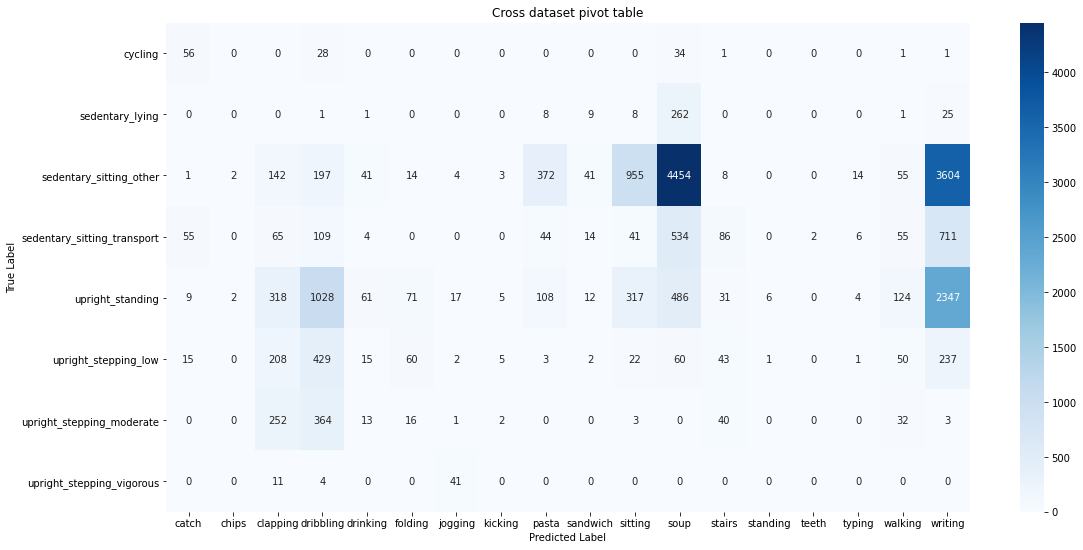

In [11]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def visualize_confusion_matrices_cross_dataset(folder_path, model_label_map_dir):
    # 1️⃣ Load Pretrained Model label mapping
    model_label_mapping_path = os.path.join(model_label_map_dir, "label_mapping.json")
    if not os.path.exists(model_label_mapping_path):
        raise FileNotFoundError(f"label_mapping.json not found in {model_label_map_dir}")
    with open(model_label_mapping_path, "r") as f:
        model_label_mapping = json.load(f)
    
    model_labels = list(model_label_mapping.keys())
    print(f"Pretrained Model Labels: {model_labels}")
    # 1️⃣ Load evaluation dataset label mapping
    label_mapping_path = os.path.join(folder_path, "eval_label_mapping.json")
    if not os.path.exists(label_mapping_path):
        raise FileNotFoundError(f"eval_label_mapping.json not found in {folder_path}")

    with open(label_mapping_path, "r") as f:
        label_mapping = json.load(f)
    
    labels = list(label_mapping.keys())
    print(f"Evaluation Dataset Labels: {labels}")
    # reverse the mapping
    label_mapping = {v: k for k, v in label_mapping.items()}
    model_label_mapping = {v: k for k, v in model_label_mapping.items()}
    # 2️⃣ Find CSV file with the longest name
    csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
    if not csv_files:
        raise FileNotFoundError("No CSV files found in the folder.")
    
    
    csv_paths = [os.path.join(folder_path, csv_file) for csv_file in csv_files]
    for csv_path in csv_paths:
        # 3️⃣ Read CSV file and map Y_test,Y_test_pred to model labels
        print(f"Processing {csv_path}")
        df = pd.read_csv(csv_path)
        print(df.head())
        if "Y_test" not in df.columns or "Y_test_pred" not in df.columns:
            raise KeyError("CSV file does not contain 'Y_test' or 'Y_test_pred' columns.")
        df["Y_test"] = df["Y_test"].map(label_mapping) # Map to evaluation dataset labels
        df["Y_test_pred"] = df["Y_test_pred"].map(model_label_mapping) # Map to model labels
        print(f"Y_test: {df['Y_test'].unique()}")
        print(f"Y_test_pred: {df['Y_test_pred'].unique()}")
        # 4️⃣ Calculate the pivot table of true and predicted labels
        pivot_table = pd.pivot_table(df, index="Y_test", columns="Y_test_pred", aggfunc='size', fill_value=0)
        print(f"Pivot Table:\n{pivot_table}\n")
        
        # 5️⃣ Plot confusion matrix
        plt.figure(figsize=(18, 9))
        sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Blues")
                    # xticklabels=model_labels, yticklabels=labels)
        # 6️⃣ Show plot
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        participant = csv_path.split("/")[-1].split(".")[0]
        plt.title(f"Cross dataset pivot table of {participant}")
        plt.show()
    
    # combine all csv files and calculate the confusion matrix
    df = pd.concat([pd.read_csv(csv_path) for csv_path in csv_paths], ignore_index=True)
    if "Y_test" not in df.columns or "Y_test_pred" not in df.columns:
        raise KeyError("CSV file does not contain 'Y_test' or 'Y_test_pred' columns.")
    df["Y_test"] = df["Y_test"].map(label_mapping) # Map to evaluation dataset labels
    df["Y_test_pred"] = df["Y_test_pred"].map(model_label_mapping) # Map to model labels
   # 4️⃣ Calculate the pivot table
    pivot_table = pd.pivot_table(df, index="Y_test", columns="Y_test_pred", aggfunc='size', fill_value=0)
    print(f"Pivot Table:\n{pivot_table}\n")
    
    # 5️⃣ Plot pivot table
    plt.figure(figsize=(18, 9))
    sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Blues")
                # xticklabels=model_labels, yticklabels=labels)
    # 6️⃣ Show plot
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Cross dataset pivot table")
    plt.show()
    
    
    

# Usage Example
evaluation_result = "/home/hossein/ssl-wearables/data/reports/2025-02-18_18-38"
pretrained_model_label = "/home/hossein/ssl-wearables/data/reports/2025-02-18_18-02"
visualize_confusion_matrices_cross_dataset(evaluation_result, pretrained_model_label)
